# Setup Data for Train and Test Images Directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/COLAB/data.zip -d ./data

Streaming output truncated to the last 5000 lines.
  inflating: ./data/train/dog.5499.jpg  
  inflating: ./data/train/dog.55.jpg  
  inflating: ./data/train/dog.550.jpg  
  inflating: ./data/train/dog.5500.jpg  
  inflating: ./data/train/dog.5501.jpg  
  inflating: ./data/train/dog.5502.jpg  
  inflating: ./data/train/dog.5503.jpg  
  inflating: ./data/train/dog.5504.jpg  
  inflating: ./data/train/dog.5505.jpg  
  inflating: ./data/train/dog.5506.jpg  
  inflating: ./data/train/dog.5507.jpg  
  inflating: ./data/train/dog.5508.jpg  
  inflating: ./data/train/dog.5509.jpg  
  inflating: ./data/train/dog.551.jpg  
  inflating: ./data/train/dog.5510.jpg  
  inflating: ./data/train/dog.5511.jpg  
  inflating: ./data/train/dog.5512.jpg  
  inflating: ./data/train/dog.5513.jpg  
  inflating: ./data/train/dog.5514.jpg  
  inflating: ./data/train/dog.5515.jpg  
  inflating: ./data/train/dog.5516.jpg  
  inflating: ./data/train/dog.5517.jpg  
  inflating: ./data/train/dog.5518.jpg  
  inflatin

In [ ]:
import os
import shutil
import random

data_dir = 'data/train'
train_dir = 'train_data'
test_dir = 'test_data'
split_ratio = 0.8

os.makedirs(os.path.join(train_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dog'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'dog'), exist_ok=True)

cat_files = [f for f in os.listdir(data_dir) if f.startswith('cat')]
dog_files = [f for f in os.listdir(data_dir) if f.startswith('dog')]

random.shuffle(cat_files)
random.shuffle(dog_files)

def split_data(files, split_ratio):
    split_point = int(len(files) * split_ratio)
    train_files = files[:split_point]
    test_files = files[split_point:]
    return train_files, test_files

cat_train, cat_test = split_data(cat_files, split_ratio)
dog_train, dog_test = split_data(dog_files, split_ratio)

In [ ]:
def copy_files(files, source_dir, target_dir):
  for file in files:
    shutil.copy(os.path.join(source_dir, file), os.path.join(target_dir, file))

copy_files(cat_train, data_dir, os.path.join(train_dir, 'cat'))
copy_files(cat_test, data_dir, os.path.join(test_dir, 'cat'))
copy_files(dog_train, data_dir, os.path.join(train_dir, 'dog'))
copy_files(dog_test, data_dir, os.path.join(test_dir, 'dog'))

In [ ]:
import os
from PIL import Image

all_files = os.listdir(data_dir)

image_files = [f for f in all_files if f.lower(). endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

print("Using different dimension images")
for i, image_file in enumerate(image_files[:5]):
  image_path = os.path.join(data_dir, image_file)
  with Image.open(image_path) as img:
    print(f"Image {i+1} size:", img.size)

Using different dimension images
Image 1 size: (500, 374)
Image 2 size: (432, 449)
Image 3 size: (500, 265)
Image 4 size: (499, 413)
Image 5 size: (500, 454)


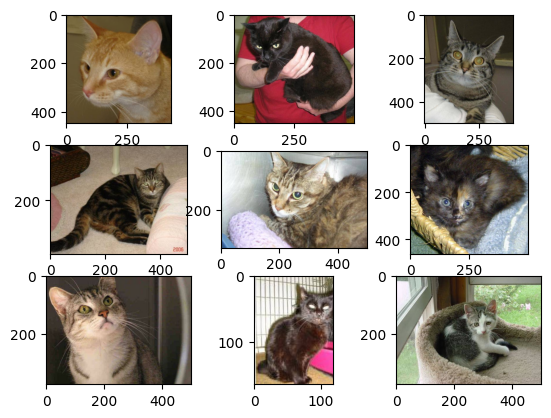

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

cat_folder = os.listdir(os.path.join(train_dir, 'cat'))
cat_files = [f for f in cat_folder if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

dog_folder = os.listdir(os.path.join(train_dir, 'dog'))
dog_files = [f for f in dog_folder if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

for i, cat_files in enumerate(cat_files[:9]):
  image_path = os.path.join(data_dir, image_file)
  pyplot.subplot(330 + 1 + i)
  image = imread(os.path.join(train_dir, 'cat', cat_files))
  pyplot.imshow(image)

pyplot.show()

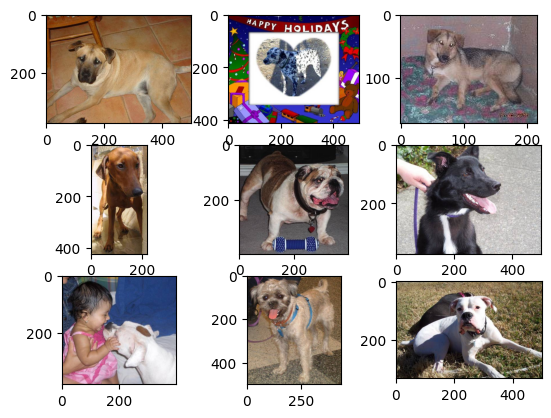

In [ ]:
for i, dog_files in enumerate(dog_files[:9]):
  image_path = os.path.join(data_dir, image_file)
  pyplot.subplot(330 + 1 + i)
  image = imread(os.path.join(train_dir, 'dog', dog_files))
  pyplot.imshow(image)

pyplot.show()

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Build The Model with Transfer Learning

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))

for layer in model.layers:
  layer.trainable = False

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)

model = Model(inputs=model.inputs, outputs=output)
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.callbacks import Callback

class TresholdCallback(Callback):
  def __init__(self, accuracy_threshold=0.925, val_accuracy_threshold=0.925):
    super(TresholdCallback, self).__init__()
    self.accuracy_threshold = accuracy_threshold
    self.val_accuracy_threshold = val_accuracy_threshold

  def on_epoch_end(self, epoch, logs=None):
    accuracy = logs.get('accuracy')
    val_accuracy = logs.get('val_accuracy')
    if accuracy is not None and val_accuracy is not None:
      if accuracy >= self.accuracy_threshold and val_accuracy >= self.val_accuracy_threshold:
        print(f'\nEpoch {epoch+1}: Reached {self.accuracy_threshold*100}% accuracy and validation accuracy, stopping training.')
        self.model.stop_training = True

In [ ]:
import tensorflow as tf
from keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size,
                    epochs=10,
                    verbose=2,
                    callbacks=[
                        tf.keras.callbacks.ModelCheckpoint(
                            "best_model.keras",
                            monitor='val_loss',
                            verbose=2,
                            save_best_only=True, mode='max'),
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=5,
                            restore_best_weights=True
                        ),
                        TresholdCallback()
                    ])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from -inf to 0.18843, saving model to best_model.keras
312/312 - 338s - 1s/step - accuracy: 0.8811 - loss: 0.3026 - val_accuracy: 0.9227 - val_loss: 0.1884
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 0.18843
312/312 - 6s - 19ms/step - accuracy: 0.9219 - loss: 0.1276 - val_accuracy: 1.0000 - val_loss: 0.0673
Epoch 3/10

Epoch 3: val_loss did not improve from 0.18843
312/312 - 337s - 1s/step - accuracy: 0.9172 - loss: 0.1958 - val_accuracy: 0.9315 - val_loss: 0.1692
Epoch 4/10

Epoch 4: val_loss did not improve from 0.18843

Epoch 4: Reached 92.5% accuracy and validation accuracy, stopping training.
312/312 - 0s - 1ms/step - accuracy: 0.9531 - loss: 0.1220 - val_accuracy: 1.0000 - val_loss: 0.0041


# Accuracy and Loss Model Plot

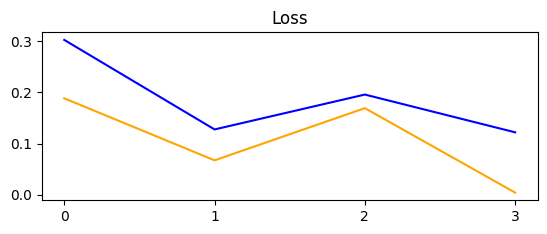

In [ ]:
import sys
from matplotlib import pyplot as plt
# plot loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.xticks(range(len(history.history['loss'])))

filename = "loss"
plt.savefig(filename + "_plot.png")
plt.show()

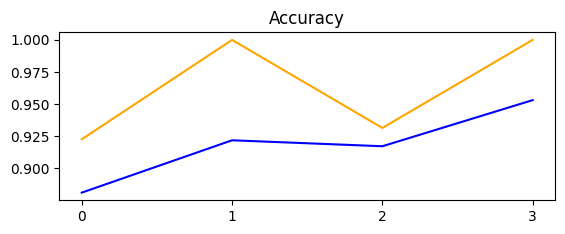

In [ ]:
# plot accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.xticks(range(len(history.history['accuracy'])))

filename = "accuracy"
plt.savefig(filename + "_plot.png")
plt.show()

# Save Final Model

In [ ]:
model.save('final_model.h5')

# Inference Model

Saving kucinggemoy.jpg to kucinggemoy (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
kucinggemoy (2).jpg
[[0.]]
Cat


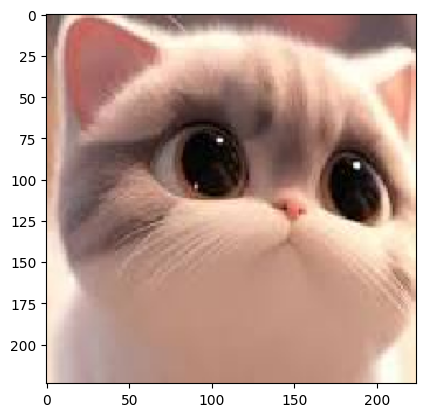

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

def load_image(filename):
  img = load_img(filename, target_size=(224, 224))
  img = img_to_array(img)
  img = img.reshape(1, 224, 224, 3)
  img = img.astype('float32')
  img = img - [123.68, 116.779, 103.939]
  return img

uploaded_img = files.upload()

for fn in uploaded_img.keys():
  path = fn
  img = load_img(path, target_size=(224, 224))

  imgplot = plt.imshow(img)
  model = load_model('final_model.h5')

  x_img = img_to_array(img)
  x_img = np.expand_dims(x_img, axis=0)
  images = np.vstack([x_img])

  result = model.predict(images)
  prediction = model.predict(images)
  print(fn)
  print(result)
  if (result[0]):
    print("Dog")
  else:
    print("Cat")